In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [2]:
#importing library
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#loading dataset
df=pd.read_csv('StudentsPerformance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.shape

(1000, 8)

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
#number of unique items in dataset
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [9]:
#statistics about dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [10]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,1000,NaN,NaN,NaN,66.089,15.1631,0,57,66,77,100
reading score,1000,NaN,NaN,NaN,69.169,14.6002,17,59,70,79,100
writing score,1000,NaN,NaN,NaN,68.054,15.1957,10,57.75,69,79,100


In [11]:
#adding a new column
df['total score']=df['math score']+df['reading score']+df['writing score']
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [12]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,1000,NaN,NaN,NaN,66.089,15.1631,0,57,66,77,100
reading score,1000,NaN,NaN,NaN,69.169,14.6002,17,59,70,79,100
writing score,1000,NaN,NaN,NaN,68.054,15.1957,10,57.75,69,79,100
total score,1000,NaN,NaN,NaN,203.312,42.772,27,175,205,233,300


In [13]:
df.groupby('gender').max()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
gender,,,,,,,,
female,group E,some high school,standard,none,100,100,100,300
male,group E,some high school,standard,none,100,100,100,300


In [14]:
df.groupby('gender').mean()

,math score,reading score,writing score,total score
gender,,,,
female,63.633205,72.608108,72.467181,208.708494
male,68.728216,65.473029,63.311203,197.512448


In [15]:
df.groupby('parental level of education').mean()

,math score,reading score,writing score,total score
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207
bachelor's degree,69.389831,73.000000,73.381356,215.771186
high school,62.137755,64.704082,62.448980,189.290816
master's degree,69.745763,75.372881,75.677966,220.796610
some college,67.128319,69.460177,68.840708,205.429204
some high school,63.497207,66.938547,64.888268,195.324022


In [16]:
df.groupby('parental level of education').max()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score
parental level of education,,,,,,,,
associate's degree,male,group E,standard,none,100,100,100,300
bachelor's degree,male,group E,standard,none,100,100,100,300
high school,male,group E,standard,none,99,99,100,287
master's degree,male,group E,standard,none,95,100,100,293
some college,male,group E,standard,none,100,100,99,297
some high school,male,group E,standard,none,97,100,100,297


In [17]:
df.groupby('lunch').max()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,total score
lunch,,,,,,,,
free/reduced,male,group E,some high school,none,100,100,100,293
standard,male,group E,some high school,none,100,100,100,300


In [18]:
grp = df.groupby('gender')
grp

In [19]:
for gender, data in grp:
    print("gender:",gender)
    print("\n")
    print("data:",data)
    print("\n\n")

gender: female


data:      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
5    female        group B          associate's degree      standard   
6    female        group B                some college      standard   
..      ...            ...                         ...           ...   
993  female        group D           bachelor's degree  free/reduced   
995  female        group E             master's degree      standard   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72

In [20]:
grp.get_group('male')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
7,male,group B,some college,free/reduced,none,40,43,39,122
8,male,group D,high school,free/reduced,completed,64,64,67,195
10,male,group C,associate's degree,standard,none,58,54,52,164
...,...,...,...,...,...,...,...,...,...
985,male,group A,high school,standard,none,57,51,54,162
987,male,group E,some high school,standard,completed,81,75,76,232
990,male,group E,high school,free/reduced,completed,86,81,75,242
994,male,group A,high school,standard,none,63,63,62,188


In [21]:
grp.describe()

math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       reading score             ... writing score        total score  \
               count       mean  ...           75%    max       count   
gender                           ...                                    
female         518.0  72.608108  ...         82.00  100.0       518.0   
male           482.0  65.473029  ...         73.75  100.0       482.0   

                                                                  
              mean        std   min    25%    50%     75%    max  
gender                                                            
female  208.708494  43.625427  27.0  182.0  211.0  236.00  300.0  
male    197.512448  41.096520  69.0  168.0  199.0  228.75  300.0  

[2 rows x 32 columns]

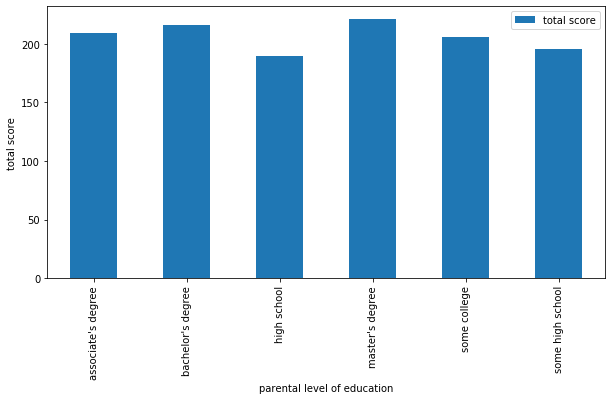

In [22]:
# visualizing the average total score of the students for different parental level of education
mean_price = df[['total score','parental level of education']].groupby('parental level of education').mean()
mean_price.plot(kind='bar', figsize=(10,5))
plt.ylabel('total score')
plt.show()

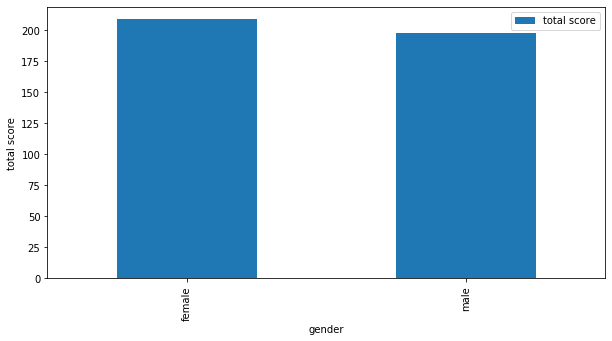

In [23]:
# visualizing the average total score of the students for different gender
mean_price = df[['total score','gender']].groupby('gender').mean()
mean_price.plot(kind='bar', figsize=(10,5))
plt.ylabel('total score')
plt.show()

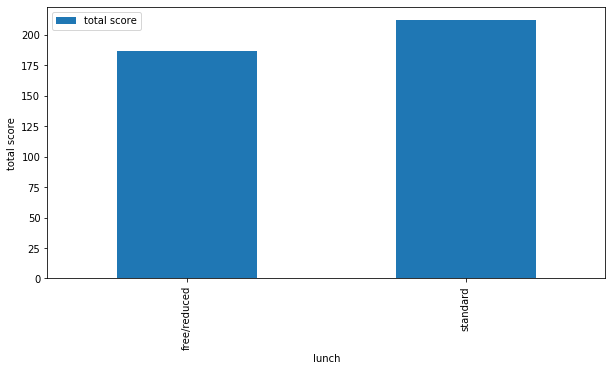

In [24]:
# visualizing the average total score of the students for different lunch
mean_price = df[['total score','lunch']].groupby('lunch').mean()
mean_price.plot(kind='bar', figsize=(10,5))
plt.ylabel('total score')
plt.show()

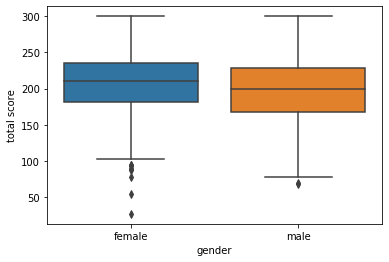

In [25]:
#
sn.boxplot(x='gender', y='total score', data=df)
plt.show()

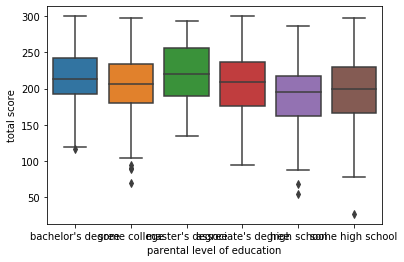

In [26]:
sn.boxplot(x='parental level of education', y='total score', data=df)
plt.show()

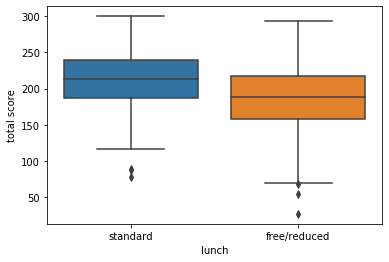

In [27]:
sn.boxplot(x='lunch', y='total score', data=df)
plt.show()

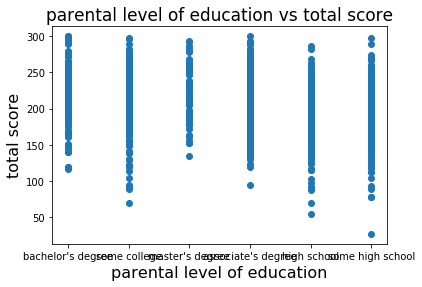

In [28]:
#scatter plot
plt.scatter(df['parental level of education'], df['total score'])
plt.title('parental level of education vs total score', fontsize=17)
plt.xlabel('parental level of education', fontsize=16)
plt.ylabel('total score', fontsize=16)
plt.show()

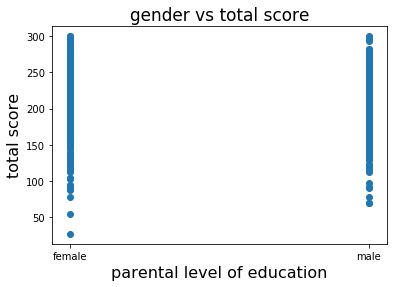

In [29]:
#scatter plot
plt.scatter(df['gender'], df['total score'])
plt.title('gender vs total score', fontsize=17)
plt.xlabel('parental level of education', fontsize=16)
plt.ylabel('total score', fontsize=16)
plt.show()

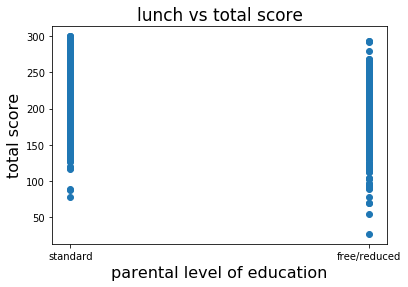

In [30]:
#scatter plot
plt.scatter(df['lunch'], df['total score'])
plt.title('lunch vs total score', fontsize=17)
plt.xlabel('parental level of education', fontsize=16)
plt.ylabel('total score', fontsize=16)
plt.show()

In [31]:
df[['gender', 'parental level of education', 'lunch','total score']].groupby(['gender', 'parental level of education','lunch']).mean()

total score
gender parental level of education lunch                    
female associate's degree          free/reduced   197.722222
                                   standard       220.412500
       bachelor's degree           free/reduced   213.181818
                                   standard       229.829268
       high school                 free/reduced   175.216216
                                   standard       206.596491
       master's degree             free/reduced   202.000000
                                   standard       233.000000
       some college                free/reduced   196.136364
                                   standard       223.040541
       some high school            free/reduced   169.277778
                                   standard       214.636364
male   associate's degree          free/reduced   195.024390
                                   standard       209.015385
       bachelor's degree           free/reduced   189.136364
                                   standard       217.787879
       high school                 free/reduced   168.666667
                                   standard       192.405797
       master's degree             free/reduced   200.400000
                                   standard       236.076923
       some college                free/reduced   179.828571
                                   standard       205.452055
       some high school            free/reduced   175.120000
                                   standard       201.365079

In [32]:
df[['gender', 'lunch', 'total score']].groupby(['gender', 'lunch']).mean()

total score
gender lunch                    
female free/reduced   189.645503
       standard       219.659574
male   free/reduced   183.126506
       standard       205.069620

In [33]:
df[['gender', 'parental level of education', 'total score']].groupby(['gender', 'parental level of education']).mean()

total score
gender parental level of education             
female associate's degree            213.370690
       bachelor's degree             224.015873
       high school                   194.244681
       master's degree               220.944444
       some college                  213.008475
       some high school              196.692308
male   associate's degree            203.603774
       bachelor's degree             206.327273
       high school                   184.725490
       master's degree               220.565217
       some college                  197.148148
       some high school              193.909091

In [34]:
#correlation between all the variables
df.corr()

,math score,reading score,writing score,total score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
total score,0.918746,0.970331,0.965667,1.000000


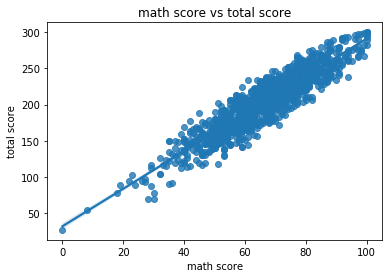

In [35]:
sn.regplot(x="math score", y="total score", data=df)
plt.title("math score vs total score")
plt.show()